In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
#from api_keys import api_key


key = "d934602ac79ba381ee5e246d4677ae1900520da1"

In [2]:
# Collect US Data 2010 - 2017
#----------------------------------------
population=[]
hs_diploma=[]
some_college=[]
associates=[]
bachelor=[]
graduate=[]
geo_id=[]
date=[]
years = ['2017','2016','2015','2014','2013','2012','2011','2010']

for year in years:
    
    date.append(year)
    url = "https://api.census.gov/data/" + year + "/acs/acs1/subject?get=NAME,S1501_C01_006E,S1501_C01_009E,S1501_C01_010E,S1501_C01_011E,S1501_C01_012E,S1501_C01_013E&for=us:*&key=" + key
    #print(url)

    response = response = requests.get(url).json()
    #pprint(response)
    
    population.append(float(response[1][1]))
    hs_diploma.append(float(response[1][2]))
    some_college.append(float(response[1][3]))
    associates.append(float(response[1][4]))
    bachelor.append(float(response[1][5]))
    graduate.append(float(response[1][6]))
    geo_id.append(response[0][7])
    
    
us_degree_df = pd.DataFrame({"Population":population,
                             "HighSchool":hs_diploma,
                             "SomeCollege":some_college,
                             "Associates":associates,
                             "Bachelors":bachelor,
                             "Graduate":graduate,
                             "GeoID":geo_id,
                             "Year":date})

#Find Percent of Population with High Level Degrees
#---------------------------------------------------

HSPercent = []
SomColPercent = []
AssocPercent = []
BachelPercent = []
GradPercent = []

for index, row in us_degree_df.iterrows():
    
    if row["HighSchool"] > 100:
        
        percent = row["HighSchool"] / row["Population"]*100
        HSPercent.append(percent)         
    
    else :
        percent = row["HighSchool"]
        HSPercent.append(percent)

us_degree_df["HSPercent"]= HSPercent

for index, row in us_degree_df.iterrows():        
    if row["SomeCollege"] > 100:
        
        percent = row["SomeCollege"] / row["Population"]*100
        SomColPercent.append(percent)         
    
    else :
        percent = row["SomeCollege"]
        SomColPercent.append(percent)     


us_degree_df["SomColPercent"]= SomColPercent

for index, row in us_degree_df.iterrows():        
    if row["Associates"] > 100:
        
        percent = row["Associates"] / row["Population"]*100
        AssocPercent.append(percent)         
    
    else :
        percent = row["Associates"]
        AssocPercent.append(percent)
        
us_degree_df["AssocPercent"]= AssocPercent

for index, row in us_degree_df.iterrows():        
    if row["Bachelors"] > 100:
        
        percent = row["Bachelors"] / row["Population"]*100
        BachelPercent.append(percent)         
    
    else :
        percent = row["Bachelors"]
        BachelPercent.append(percent)
        
us_degree_df["BachelPercent"]= BachelPercent

for index, row in us_degree_df.iterrows():        
    if row["Graduate"] > 100:
       
        percent = row["Graduate"] / row["Population"]*100
        GradPercent.append(percent)         
    
    else :
        percent = row["Graduate"]
        GradPercent.append(percent)
        

us_degree_df["GradPercent"]= GradPercent
us_degree_df = us_degree_df.sort_values(by=["Year"],ascending=True)
us_degree_df
    


,Population,HighSchool,SomeCollege,Associates,Bachelors,Graduate,GeoID,Year,HSPercent,SomColPercent,AssocPercent,BachelPercent,GradPercent
7,204288933.0,28.5,21.3,7.6,17.7,10.4,us,2010,28.500000,21.300000,7.600000,17.700000,10.400000
6,206471670.0,28.4,21.2,7.8,17.9,10.6,us,2011,28.400000,21.200000,7.800000,17.900000,10.600000
5,208731498.0,28.0,21.3,8.0,18.2,10.9,us,2012,28.000000,21.300000,8.000000,18.200000,10.900000
4,210910615.0,27.8,21.1,8.1,18.4,11.2,us,2013,27.800000,21.100000,8.100000,18.400000,11.200000
3,213725624.0,27.7,21.0,8.2,18.7,11.4,us,2014,27.700000,21.000000,8.200000,18.700000,11.400000
2,216447163.0,59662981.0,44909753.0,17806750.0,41152388.0,25089165.0,us,2015,27.564686,20.748599,8.226835,19.012671,11.591358
1,218475480.0,59373780.0,45095348.0,18259841.0,42242395.0,26091882.0,us,2016,27.176404,20.640920,8.357845,19.335074,11.942705
0,221250083.0,60031545.0,45109653.0,18760759.0,43585028.0,27180887.0,us,2017,27.132892,20.388536,8.479436,19.699440,12.285142


In [3]:
# Collect Seattle Data 2010 - 2017
population=[]
hs_diploma=[]
some_college=[]
associates=[]
bachelor=[]
graduate=[]
geo_id=[]
date=[]
years = ['2017','2016','2015','2014','2013','2012','2011','2010']

for year in years:
    
    date.append(year)
    geo_id.append("Seattle")
    url = "https://api.census.gov/data/" + year + "/acs/acs1/subject?get=NAME,S1501_C01_006E,S1501_C01_009E,S1501_C01_010E,S1501_C01_011E,S1501_C01_012E,S1501_C01_013E&for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:42660&key=" + key

    response = response = requests.get(url).json()
     
    population.append(float(response[1][1]))
    hs_diploma.append(float(response[1][2]))
    some_college.append(float(response[1][3]))
    associates.append(float(response[1][4]))
    bachelor.append(float(response[1][5]))
    graduate.append(float(response[1][6]))

seattle_degree_df = pd.DataFrame({"Population":population,
                             "HighSchool":hs_diploma,
                             "SomeCollege":some_college,
                             "Associates":associates,
                             "Bachelors":bachelor,
                             "Graduate":graduate,
                             "GeoID":geo_id,
                             "Year":date})

#Find Percent of Population with High Level Degrees
#---------------------------------------------------

HSPercent = []
SomColPercent = []
AssocPercent = []
BachelPercent = []
GradPercent = []

for index, row in seattle_degree_df.iterrows():
    
    if row["HighSchool"] > 100:
        
        percent = row["HighSchool"] / row["Population"]*100
        HSPercent.append(percent)         
    
    else :
        percent = row["HighSchool"]
        HSPercent.append(percent)

seattle_degree_df["HSPercent"]= HSPercent

for index, row in seattle_degree_df.iterrows():        
    if row["SomeCollege"] > 100:
        
        percent = row["SomeCollege"] / row["Population"]*100
        SomColPercent.append(percent)         
    
    else :
        percent = row["SomeCollege"]
        SomColPercent.append(percent)     


seattle_degree_df["SomColPercent"]= SomColPercent

for index, row in seattle_degree_df.iterrows():        
    if row["Associates"] > 100:
       
        percent = row["Associates"] / row["Population"]*100
        AssocPercent.append(percent)         
    
    else :
        percent = row["Associates"]
        AssocPercent.append(percent)
        
seattle_degree_df["AssocPercent"]= AssocPercent

for index, row in seattle_degree_df.iterrows():        
    if row["Bachelors"] > 100:
        
        percent = row["Bachelors"] / row["Population"]*100
        BachelPercent.append(percent)         
    
    else :
        percent = row["Bachelors"]
        BachelPercent.append(percent)
        
seattle_degree_df["BachelPercent"]= BachelPercent

for index, row in seattle_degree_df.iterrows():        
    if row["Graduate"] > 100:
        
        percent = row["Graduate"] / row["Population"]*100
        GradPercent.append(percent)         
    
    else :
        percent = row["Graduate"]
        GradPercent.append(percent)
        

seattle_degree_df["GradPercent"]= GradPercent
seattle_degree_df = seattle_degree_df.sort_values(by=["Year"],ascending=True)
seattle_degree_df

,Population,HighSchool,SomeCollege,Associates,Bachelors,Graduate,GeoID,Year,HSPercent,SomColPercent,AssocPercent,BachelPercent,GradPercent
7,2342330.0,21.5,23.7,9.0,23.9,13.1,Seattle,2010,21.500000,23.700000,9.000000,23.900000,13.100000
6,2386993.0,22.0,22.9,9.4,23.5,13.6,Seattle,2011,22.000000,22.900000,9.400000,23.500000,13.600000
5,2432130.0,21.5,23.4,9.2,24.2,13.5,Seattle,2012,21.500000,23.400000,9.200000,24.200000,13.500000
4,2479730.0,20.3,22.9,9.0,25.2,14.2,Seattle,2013,20.300000,22.900000,9.000000,25.200000,14.200000
3,2530058.0,20.3,22.6,9.5,24.9,14.5,Seattle,2014,20.300000,22.600000,9.500000,24.900000,14.500000
2,2587548.0,527786.0,562884.0,233912.0,676854.0,388154.0,Seattle,2015,20.397148,21.753567,9.039910,26.158123,15.000842
1,2645731.0,517528.0,563668.0,241363.0,689822.0,420457.0,Seattle,2016,19.560870,21.304811,9.122734,26.073021,15.891903
0,2707906.0,537123.0,577499.0,257117.0,703108.0,432507.0,Seattle,2017,19.835364,21.326405,9.495049,25.965008,15.972009


In [4]:
#Washington State Data 2010 -2017
population=[]
hs_diploma=[]
some_college=[]
associates=[]
bachelor=[]
graduate=[]
geo_id=[]
date=[]
years = ['2017','2016','2015','2014','2013','2012','2011','2010']

for year in years:
    
    date.append(year)
    geo_id.append("WA")
    url = "https://api.census.gov/data/" + year + "/acs/acs1/subject?get=NAME,S1501_C01_006E,S1501_C01_009E,S1501_C01_010E,S1501_C01_011E,S1501_C01_012E,S1501_C01_013E&for=state:53&key=" + key
  
    response = response = requests.get(url).json()
        
    population.append(float(response[1][1]))
    hs_diploma.append(float(response[1][2]))
    some_college.append(float(response[1][3]))
    associates.append(float(response[1][4]))
    bachelor.append(float(response[1][5]))
    graduate.append(float(response[1][6]))

WA_degree_df = pd.DataFrame({"Population":population,
                             "HighSchool":hs_diploma,
                             "SomeCollege":some_college,
                             "Associates":associates,
                             "Bachelors":bachelor,
                             "Graduate":graduate,
                             "GeoID":geo_id,
                             "Year":date})

HSPercent = []
SomColPercent = []
AssocPercent = []
BachelPercent = []
GradPercent = []

for index, row in WA_degree_df.iterrows():
    
    if row["HighSchool"] > 100:
        
        percent = row["HighSchool"] / row["Population"]*100
        HSPercent.append(percent)         
    
    else :
        percent = row["HighSchool"]
        HSPercent.append(percent)

WA_degree_df["HSPercent"]= HSPercent

for index, row in WA_degree_df.iterrows():        
    if row["SomeCollege"] > 100:
        
        percent = row["SomeCollege"] / row["Population"]*100
        SomColPercent.append(percent)         
    
    else :
        percent = row["SomeCollege"]
        SomColPercent.append(percent)     


WA_degree_df["SomColPercent"]= SomColPercent

for index, row in WA_degree_df.iterrows():        
    if row["Associates"] > 100:
       
        percent = row["Associates"] / row["Population"]*100
        AssocPercent.append(percent)         
    
    else :
        percent = row["Associates"]
        AssocPercent.append(percent)
        
WA_degree_df["AssocPercent"]= AssocPercent

for index, row in WA_degree_df.iterrows():        
    if row["Bachelors"] > 100:
        
        percent = row["Bachelors"] / row["Population"]*100
        BachelPercent.append(percent)         
    
    else :
        percent = row["Bachelors"]
        BachelPercent.append(percent)
        
WA_degree_df["BachelPercent"]= BachelPercent

for index, row in WA_degree_df.iterrows():        
    if row["Graduate"] > 100:
       
        percent = row["Graduate"] / row["Population"]*100
        GradPercent.append(percent)         
    
    else :
        percent = row["Graduate"]
        GradPercent.append(percent)
        

WA_degree_df["GradPercent"]= GradPercent
WA_degree_df = WA_degree_df.sort_values(by=["Year"],ascending=True)
WA_degree_df



,Population,HighSchool,SomeCollege,Associates,Bachelors,Graduate,GeoID,Year,HSPercent,SomColPercent,AssocPercent,BachelPercent,GradPercent
7,4505657.0,23.8,25.5,9.4,19.9,11.1,WA,2010,23.800000,25.500000,9.400000,19.900000,11.100000
6,4583426.0,23.8,24.7,9.7,20.2,11.7,WA,2011,23.800000,24.700000,9.700000,20.200000,11.700000
5,4645859.0,23.7,25.4,9.6,20.3,11.3,WA,2012,23.700000,25.400000,9.600000,20.300000,11.300000
4,4706104.0,23.3,24.6,9.5,20.9,11.8,WA,2013,23.300000,24.600000,9.500000,20.900000,11.800000
3,4784484.0,22.8,24.5,10.0,21.0,12.1,WA,2014,22.800000,24.500000,10.000000,21.000000,12.100000
2,4889314.0,1127649.0,1171141.0,471400.0,1059707.0,611186.0,WA,2015,23.063542,23.953074,9.641434,21.673940,12.500445
1,4996555.0,1111786.0,1178772.0,491450.0,1098509.0,657201.0,WA,2016,22.251051,23.591695,9.835777,21.985328,13.153082
0,5101968.0,1128284.0,1203615.0,514987.0,1130392.0,680727.0,WA,2017,22.114682,23.591191,10.093889,22.155999,13.342440


In [5]:
HSPercent = []
SomColPercent = []
AssocPercent = []
BachelPercent = []
GradPercent = []

for index, row in WA_degree_df.iterrows():
    
    if row["HighSchool"] > 100:
        
        percent = row["HighSchool"] / row["Population"]*100
        HSPercent.append(percent)         
    
    else :
        percent = row["HighSchool"]
        HSPercent.append(percent)

WA_degree_df["HSPercent"]= HSPercent

for index, row in WA_degree_df.iterrows():        
    if row["SomeCollege"] > 100:
        
        percent = row["SomeCollege"] / row["Population"]*100
        SomColPercent.append(percent)         
    
    else :
        percent = row["SomeCollege"]
        SomColPercent.append(percent)     


WA_degree_df["SomColPercent"]= SomColPercent

for index, row in WA_degree_df.iterrows():        
    if row["Associates"] > 100:
       
        percent = row["Associates"] / row["Population"]*100
        AssocPercent.append(percent)         
    
    else :
        percent = row["Associates"]
        AssocPercent.append(percent)
        
WA_degree_df["AssocPercent"]= AssocPercent

for index, row in WA_degree_df.iterrows():        
    if row["Bachelors"] > 100:
        
        percent = row["Bachelors"] / row["Population"]*100
        BachelPercent.append(percent)         
    
    else :
        percent = row["Bachelors"]
        BachelPercent.append(percent)
        
WA_degree_df["BachelPercent"]= BachelPercent

for index, row in WA_degree_df.iterrows():        
    if row["Graduate"] > 100:
       
        percent = row["Graduate"] / row["Population"]*100
        GradPercent.append(percent)         
    
    else :
        percent = row["Graduate"]
        GradPercent.append(percent)
        

WA_degree_df["GradPercent"]= GradPercent
WA_degree_df = WA_degree_df.sort_values(by=["Year"],ascending=True)
WA_degree_df

,Population,HighSchool,SomeCollege,Associates,Bachelors,Graduate,GeoID,Year,HSPercent,SomColPercent,AssocPercent,BachelPercent,GradPercent
7,4505657.0,23.8,25.5,9.4,19.9,11.1,WA,2010,23.800000,25.500000,9.400000,19.900000,11.100000
6,4583426.0,23.8,24.7,9.7,20.2,11.7,WA,2011,23.800000,24.700000,9.700000,20.200000,11.700000
5,4645859.0,23.7,25.4,9.6,20.3,11.3,WA,2012,23.700000,25.400000,9.600000,20.300000,11.300000
4,4706104.0,23.3,24.6,9.5,20.9,11.8,WA,2013,23.300000,24.600000,9.500000,20.900000,11.800000
3,4784484.0,22.8,24.5,10.0,21.0,12.1,WA,2014,22.800000,24.500000,10.000000,21.000000,12.100000
2,4889314.0,1127649.0,1171141.0,471400.0,1059707.0,611186.0,WA,2015,23.063542,23.953074,9.641434,21.673940,12.500445
1,4996555.0,1111786.0,1178772.0,491450.0,1098509.0,657201.0,WA,2016,22.251051,23.591695,9.835777,21.985328,13.153082
0,5101968.0,1128284.0,1203615.0,514987.0,1130392.0,680727.0,WA,2017,22.114682,23.591191,10.093889,22.155999,13.342440


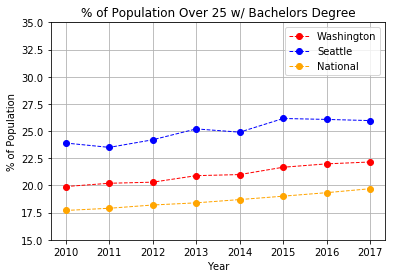

In [6]:
# 2010-2017Bachelors Degree Line Graph

plt.plot(WA_degree_df["Year"],WA_degree_df["BachelPercent"], label="Washington", linestyle='dashed',linewidth=1, color='r', marker='o')
plt.plot(seattle_degree_df["Year"],seattle_degree_df["BachelPercent"], label="Seattle", linestyle='dashed',linewidth=1, color='b', marker='o')
plt.plot(us_degree_df["Year"],us_degree_df["BachelPercent"], label="National", linestyle='dashed',linewidth=1, color='orange', marker='o')

plt.legend(loc="best")

#Add labels
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.title("% of Population Over 25 w/ Bachelors Degree")

plt.ylim(15,35)

plt.savefig("BachelorsLine.png", bbox="tight")

#Add Grid
plt.grid(axis="both")

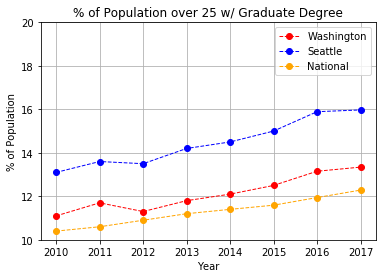

In [7]:
#Graduate Degree Line Graph

plt.plot(WA_degree_df["Year"],WA_degree_df["GradPercent"], label="Washington", linestyle='dashed',linewidth=1, color='r', marker='o')
plt.plot(seattle_degree_df["Year"],seattle_degree_df["GradPercent"], label="Seattle", linestyle='dashed',linewidth=1, color='b', marker='o')
plt.plot(us_degree_df["Year"],us_degree_df["GradPercent"], label="National", linestyle='dashed',linewidth=1, color='orange', marker='o')

plt.legend(loc="best")

#Add labels
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.title("% of Population over 25 w/ Graduate Degree")

plt.ylim(10,20)
plt.savefig("GraduateLine.png", bbox="tight")

#Add Grid
plt.grid(axis="both")